# Image Compression

A grayscale image is just a matrix where the numbers represent the intensity of a given pixel, such a matrix can be decomposed just like any other matrix using Singular Value Decomposition (SVD).

SVD is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

For the case of simplicity we will focus on the SVD for real-valued matrices and ignore the case for complex numbers.
$A = U . \Sigma . V^T$

Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, Sigma ($\Sigma$) is an m x n diagonal matrix, and $V^T$ is the  transpose of an n x n matrix where T is a superscript.

The SVD can be calculated by calling python svd() function.

The function takes a matrix and returns the U, $\Sigma$ and $V^T$ elements. The Sigma diagonal matrix is returned as a vector of singular values. The V matrix is returned in a transposed form.

The original matrix can be reconstructed from the U, Sigma, and V^T elements. And if you took $r$ columns from U to make $\hat{U}$, and $r$ elements from Sigma to make $\hat{\Sigma}$ and $r$ rows from V^T to make $\hat{V}^T$, you can approximate the original matrix using $\hat{U} . \hat{\Sigma} . \hat{V}^T$

In this notebook, you will approximate a grayscale image using $r$ singular values and singular vectors from the U, Sigma and V^T matrices; hence, you compress the image into $2r$ rows and $r$ scalars only.

## Load the image

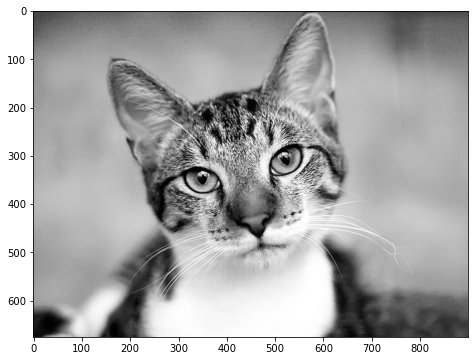

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
import time
from PIL import Image

#load an image and convert it to black and white.
img = Image.open('Domestic-feline-tabby-cat.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

## Convert the image to numpy array

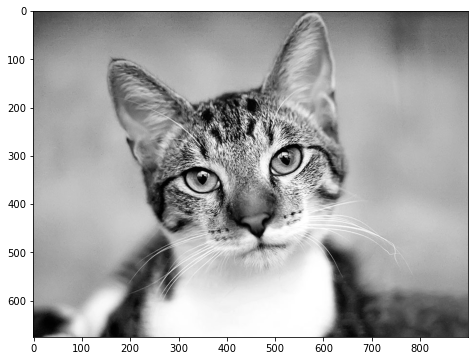

In [2]:
#convert the image data into a numpy matrix, plotting the result to show the data is unchanged.
img = np.asarray(imggray)[:,:,0]
plt.figure(figsize=(9,6))
plt.imshow(img, cmap='gray');

## Compute SVD of the image

In [3]:
U,S,Vt = np.linalg.svd(img)
print(U.shape,S.shape,Vt.shape)

Sigma = np.zeros((img.shape[0], img.shape[1]))
Sigma[:img.shape[0], :img.shape[0]] = np.diag(S)
B = U.dot(Sigma.dot(Vt))

(675, 675) (675,) (900, 900)


## Check if you can reconstruct the image again

Plot the image

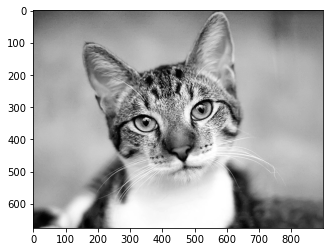

In [4]:
plt.imshow(B, cmap='gray');

## Reconstruct the image using $r = 1$

Plot the reconstructed image

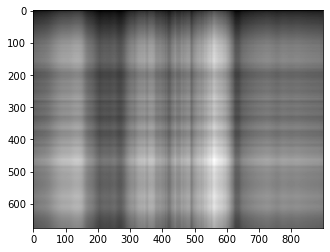

In [5]:
B = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(Vt[:1, :])
plt.imshow(B, cmap='gray');

## Reconstruct the image using $r = 2 \rightarrow 50$

Plot the reconstructed images

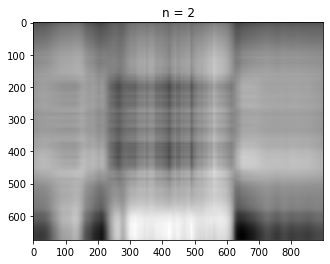

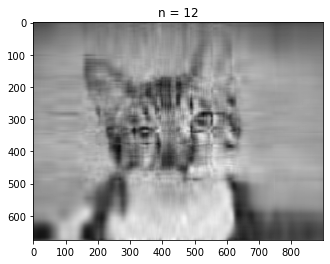

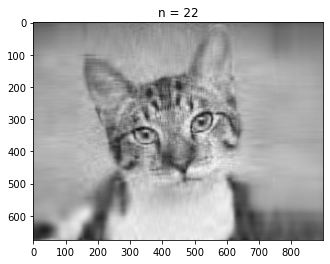

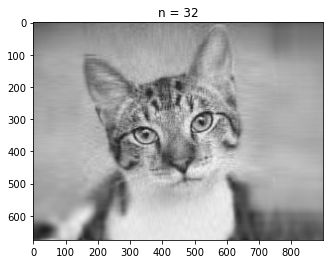

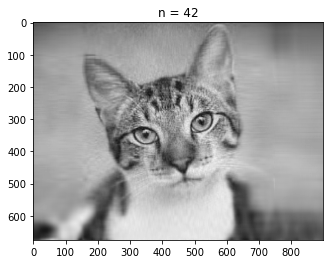

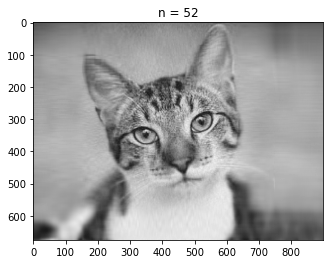

In [10]:
for i in range (2,53,10):
    B = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(B, cmap='gray');
    plt.title(f'n = {i}')
    plt.show()

In [11]:
matrix_rank(img)

675

In [12]:
matrix_rank(B)

52